In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 30})

In [2]:
benergy_c = np.arange(-7.5, -5.25, 0.25)
benergy_o = np.arange(-3.25, -5.5, -0.25)

In [3]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))

In [4]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
#             ch4_conv = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'Max CH4 Conv'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[3.47476200e-01, 3.53013054e-01, 3.53130760e-01, 3.47536286e-01,
        3.09750066e-01, 2.78923836e-01, 2.75536319e-01, 2.70746785e-01,
        2.67161471e-01],
       [8.09694501e-13, 3.49270054e-01, 3.51256172e-01, 3.46848310e-01,
        3.21267719e-01, 2.62559517e-01, 2.00535478e-01, 1.75732513e-01,
        1.70333437e-01],
       [8.63290522e-13, 3.48856950e-01, 3.51355483e-01, 3.46294287e-01,
        3.35593460e-01, 2.96540064e-01, 2.18850103e-01, 1.70081950e-01,
        1.54360601e-01],
       [8.19558799e-13, 3.52958353e-01, 3.54429231e-01, 3.48459701e-01,
        3.34749015e-01, 2.87735637e-01, 1.12923644e-01, 5.42952792e-02,
        4.90157970e-02],
       [8.03118302e-13, 3.51396262e-01, 3.52560164e-01, 3.43564085e-01,
        3.04791397e-01, 1.02838208e-01, 7.85384112e-03, 5.95532236e-03,
        5.70444859e-03],
       [8.18243559e-13, 1.06918625e-02, 3.28940905e-01, 2.72888244e-01,
        3.77648344e-03, 9.24023180e-04, 7.21071342e-04, 6.86892724e-04,
        6.7

In [5]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,3.474762e-01,0.353013,0.353131,0.347536,3.097501e-01,2.789238e-01,2.755363e-01,2.707468e-01,2.671615e-01
-3.50,8.096945e-13,0.349270,0.351256,0.346848,3.212677e-01,2.625595e-01,2.005355e-01,1.757325e-01,1.703334e-01
-3.75,8.632905e-13,0.348857,0.351355,0.346294,3.355935e-01,2.965401e-01,2.188501e-01,1.700819e-01,1.543606e-01
-4.00,8.195588e-13,0.352958,0.354429,0.348460,3.347490e-01,2.877356e-01,1.129236e-01,5.429528e-02,4.901580e-02
-4.25,8.031183e-13,0.351396,0.352560,0.343564,3.047914e-01,1.028382e-01,7.853841e-03,5.955322e-03,5.704449e-03
-4.50,8.182436e-13,0.010692,0.328941,0.272888,3.776483e-03,9.240232e-04,7.210713e-04,6.868927e-04,6.797666e-04
-4.75,8.172571e-13,0.010688,0.236594,0.002095,6.723622e-05,1.530760e-05,9.708488e-06,8.358907e-06,8.092371e-06
-5.00,8.195588e-13,0.010687,0.089099,0.000044,4.060029e-06,9.682872e-07,2.516578e-07,1.102923e-07,9.859818e-08
-5.25,8.184080e-13,0.010680,0.007495,0.000003,4.381161e-07,8.351661e-08,1.104936e-08,4.986344e-09,4.816331e-09


In [4]:
# metals = {'Pt': {'C':-7.02516, 'O':-3.81153}, 'Pd':{'C':-7.16786, 'O':-4.13577}, 'Rh':{'C':-7.33484, 'O':-4.71419}, 
#           'Ru': {'C':-7.5979, 'O':-5.4492}, 'Ni': {'C':-6.79794, 'O':-4.98902}}
metals = {'Pt': {'C':-7.02516, 'O':-3.81153}, 'Pd':{'C':-7.16786, 'O':-4.13577}, 'Rh':{'C':(-6.65 - 7.11) / 2, 'O':(-4.31 - 4.88) / 2}, 'Ni': {'C':-6.79794, 'O':-4.98902}}
metal_x = []
metal_y = []
metal_names = []
for i, v in metals.items():
    metal_x.append(abs(v['C'] + 7.5) / 2.25 * 9)
    metal_y.append(abs(v['O'] + 3.125) / 2.25 * 9)
    metal_names.append(i)

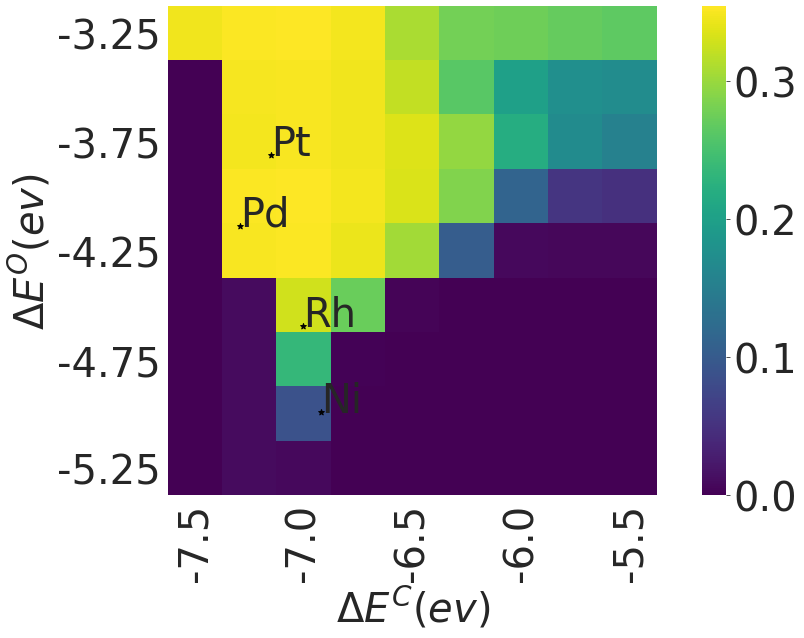

In [10]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
xticks = np.linspace(-5.5,-3.0,5)
yticks = np.linspace(-7.5, -5.25, 5)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/0.6_ch4_conv_original.pdf', bbox_inches='tight')

## Heat Map For Syngas Conversion at C/O=0.6

In [11]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CO out'].to_list()[0]
            syngas_conv = co_out + h2_out
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[2.87890861e-02, 2.89028075e-02, 2.86316256e-02, 2.76352685e-02,
        1.76470441e-02, 7.64037736e-03, 4.14933800e-04, 4.06918158e-07,
        6.84780846e-08],
       [3.02882633e-12, 2.87664496e-02, 2.85349403e-02, 2.75628549e-02,
        2.25862923e-02, 1.04561663e-02, 5.20746861e-07, 3.20562745e-08,
        5.52387050e-09],
       [3.02858450e-12, 2.87380351e-02, 2.85098182e-02, 2.74928195e-02,
        2.55854885e-02, 1.86317156e-02, 4.56717721e-03, 1.92977388e-07,
        3.67393265e-08],
       [3.02851919e-12, 2.88934290e-02, 2.86571102e-02, 2.76494619e-02,
        2.55225878e-02, 1.92546638e-02, 9.77982711e-04, 7.35845071e-07,
        3.95250345e-07],
       [3.02848827e-12, 2.89107444e-02, 2.86517731e-02, 2.73467001e-02,
        2.27017980e-02, 3.21616508e-03, 2.45803250e-06, 1.37938105e-06,
        1.27748516e-06],
       [3.02848296e-12, 1.35305264e-03, 2.77742894e-02, 2.18017032e-02,
        2.31581226e-05, 2.79498194e-06, 2.10372307e-06, 1.99199087e-06,
        1.9

In [12]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,2.878909e-02,0.028903,0.028632,2.763527e-02,1.764704e-02,7.640377e-03,4.149338e-04,4.069182e-07,6.847808e-08
-3.50,3.028826e-12,0.028766,0.028535,2.756285e-02,2.258629e-02,1.045617e-02,5.207469e-07,3.205627e-08,5.523870e-09
-3.75,3.028585e-12,0.028738,0.028510,2.749282e-02,2.558549e-02,1.863172e-02,4.567177e-03,1.929774e-07,3.673933e-08
-4.00,3.028519e-12,0.028893,0.028657,2.764946e-02,2.552259e-02,1.925466e-02,9.779827e-04,7.358451e-07,3.952503e-07
-4.25,3.028488e-12,0.028911,0.028652,2.734670e-02,2.270180e-02,3.216165e-03,2.458032e-06,1.379381e-06,1.277485e-06
-4.50,3.028483e-12,0.001353,0.027774,2.180170e-02,2.315812e-05,2.794982e-06,2.103723e-06,1.991991e-06,1.975681e-06
-4.75,3.028473e-12,0.001353,0.022216,1.089844e-04,1.892072e-06,4.706963e-07,2.994110e-07,2.533322e-07,2.440935e-07
-5.00,3.028474e-12,0.001353,0.009546,3.029467e-06,1.906457e-07,4.094261e-08,9.446754e-09,3.062757e-09,2.462880e-09
-5.25,3.028470e-12,0.001352,0.000897,2.558350e-07,3.070541e-08,4.496279e-09,4.005120e-10,3.891414e-11,1.813750e-11


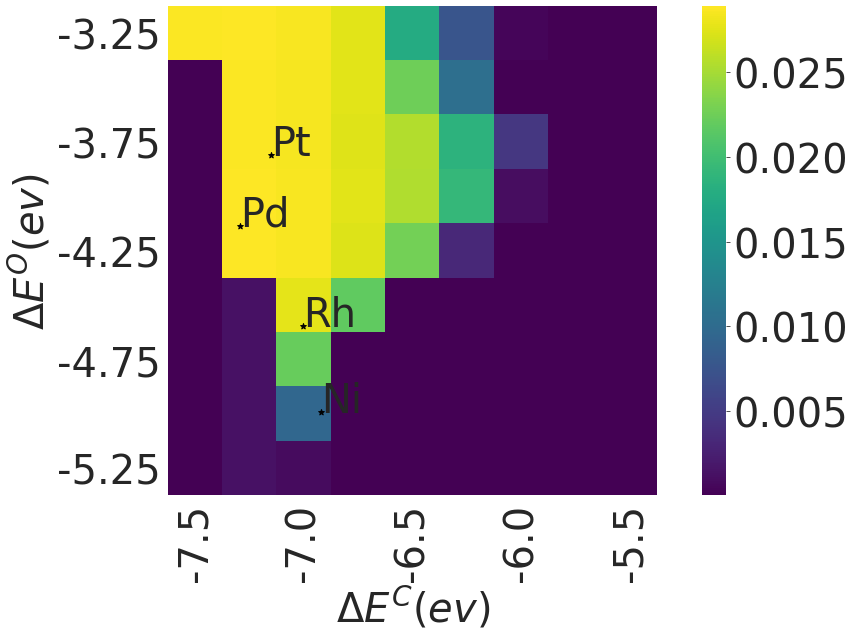

In [13]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/0.6_syngas_conv_original.pdf', bbox_inches='tight')

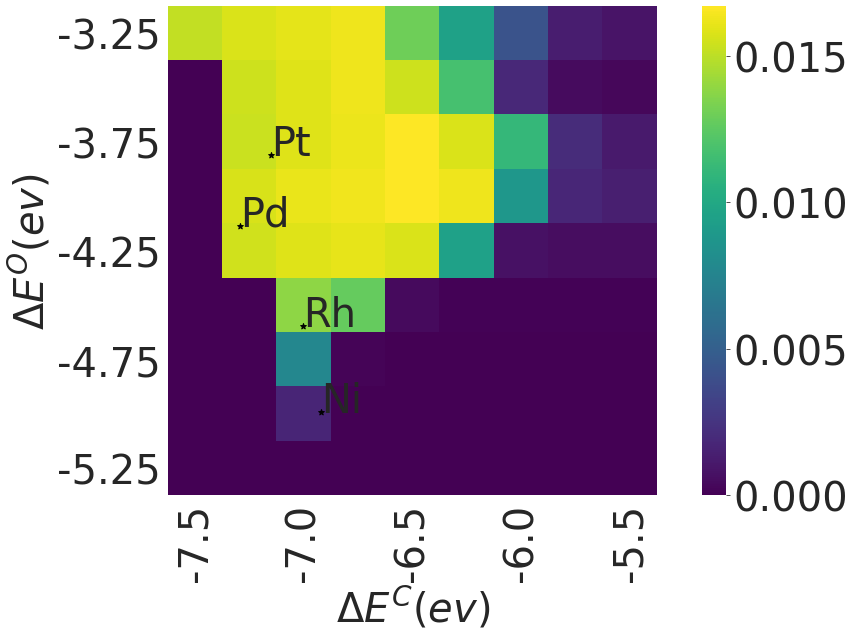

In [14]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'H2O out'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(h2o_out) + co2_out
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
# cmap = sns.color_palette("Spectral", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/0.6_full_conv_original.pdf', bbox_inches='tight')

# Plots at C/O = 1.0

In [15]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
#             ch4_conv = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'Max CH4 Conv'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 in'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[1.19330593e-12, 4.44258067e-03, 1.88199618e-01, 2.92832650e-01,
        2.81389817e-01, 2.59995104e-01, 2.46759121e-01, 2.52221268e-01,
        2.81636157e-01],
       [1.19229902e-12, 4.50518204e-03, 1.85676971e-01, 2.86284416e-01,
        2.70234316e-01, 2.48642895e-01, 2.30974680e-01, 2.33722220e-01,
        2.60496673e-01],
       [1.19330593e-12, 5.22359336e-03, 1.87427911e-01, 2.69205679e-01,
        2.58338239e-01, 2.37811454e-01, 2.17738616e-01, 2.06109969e-01,
        2.09672464e-01],
       [1.19084459e-12, 5.66751590e-03, 2.15857127e-01, 2.95297089e-01,
        2.69655532e-01, 2.35687058e-01, 1.60241070e-01, 1.17844503e-01,
        1.11007633e-01],
       [1.19330593e-12, 5.85577182e-03, 9.94135076e-02, 3.24139289e-01,
        2.82603436e-01, 1.73363251e-01, 4.64603698e-02, 2.57904223e-02,
        2.33320993e-02],
       [1.19308217e-12, 5.88893882e-03, 3.71391376e-02, 3.08391386e-01,
        1.33962588e-02, 1.04549502e-03, 7.56535302e-04, 7.13254044e-04,
        7.0

In [16]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,1.193306e-12,0.004443,0.188200,0.292833,2.813898e-01,2.599951e-01,2.467591e-01,2.522213e-01,2.816362e-01
-3.50,1.192299e-12,0.004505,0.185677,0.286284,2.702343e-01,2.486429e-01,2.309747e-01,2.337222e-01,2.604967e-01
-3.75,1.193306e-12,0.005224,0.187428,0.269206,2.583382e-01,2.378115e-01,2.177386e-01,2.061100e-01,2.096725e-01
-4.00,1.190845e-12,0.005668,0.215857,0.295297,2.696555e-01,2.356871e-01,1.602411e-01,1.178445e-01,1.110076e-01
-4.25,1.193306e-12,0.005856,0.099414,0.324139,2.826034e-01,1.733633e-01,4.646037e-02,2.579042e-02,2.333210e-02
-4.50,1.193082e-12,0.005889,0.037139,0.308391,1.339626e-02,1.045495e-03,7.565353e-04,7.132540e-04,7.048274e-04
-4.75,1.193306e-12,0.005890,0.030878,0.012545,1.097643e-04,1.692514e-05,9.560881e-06,7.981494e-06,7.675500e-06
-5.00,1.192523e-12,0.005890,0.029632,0.000087,5.287082e-06,1.114528e-06,2.820327e-07,1.187384e-07,1.055046e-07
-5.25,1.192523e-12,0.005888,0.027691,0.000005,5.325989e-07,9.714390e-08,1.304161e-08,5.954994e-09,5.740868e-09


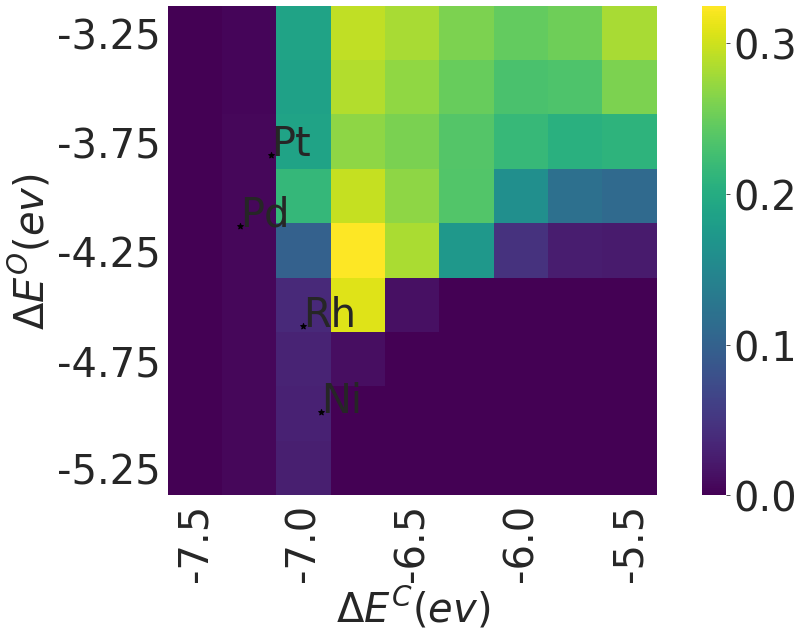

In [17]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=1 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$")
ax.set(xlabel="$\\Delta E^C(ev)$", ylabel="$\\Delta E^O(ev)$")
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/1_ch4_conv_original.pdf', bbox_inches='tight')

## syngas at C/O=1.0

In [5]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 in'].to_list()[0]
            syngas_conv = (co_out + h2_out / 2) / ch4_in
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[3.16223863e-11, 7.30154026e-03, 2.77129614e-01, 4.31539849e-01,
        3.67286448e-01, 2.59321453e-01, 1.47568386e-01, 6.24994203e-02,
        1.53275358e-02],
       [3.16205156e-11, 7.45458526e-03, 2.73423521e-01, 4.22956035e-01,
        3.78540110e-01, 2.85903404e-01, 1.69521754e-01, 6.33274265e-02,
        1.06065592e-02],
       [3.16187299e-11, 9.43337719e-03, 2.83160015e-01, 4.01368149e-01,
        3.62705840e-01, 3.02228092e-01, 1.88301703e-01, 7.30412215e-02,
        2.15329912e-02],
       [3.16170727e-11, 1.09852026e-02, 3.43280381e-01, 4.56762643e-01,
        3.89542248e-01, 3.05884575e-01, 1.28780300e-01, 2.86108694e-02,
        1.26876800e-02],
       [3.16161708e-11, 1.16530465e-02, 1.61294433e-01, 5.15848748e-01,
        4.22558648e-01, 2.03491138e-01, 7.29344919e-03, 1.12181271e-03,
        8.38525468e-04],
       [3.16158899e-11, 1.17752308e-02, 6.84112652e-02, 4.87494228e-01,
        3.83323078e-03, 5.78599989e-05, 3.95788732e-05, 3.70507819e-05,
        3.6

In [6]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,3.162239e-11,0.007302,0.277130,0.431540,3.672864e-01,2.593215e-01,1.475684e-01,6.249942e-02,1.532754e-02
-3.50,3.162052e-11,0.007455,0.273424,0.422956,3.785401e-01,2.859034e-01,1.695218e-01,6.332743e-02,1.060656e-02
-3.75,3.161873e-11,0.009433,0.283160,0.401368,3.627058e-01,3.022281e-01,1.883017e-01,7.304122e-02,2.153299e-02
-4.00,3.161707e-11,0.010985,0.343280,0.456763,3.895422e-01,3.058846e-01,1.287803e-01,2.861087e-02,1.268768e-02
-4.25,3.161617e-11,0.011653,0.161294,0.515849,4.225586e-01,2.034911e-01,7.293449e-03,1.121813e-03,8.385255e-04
-4.50,3.161589e-11,0.011775,0.068411,0.487494,3.833231e-03,5.786000e-05,3.957887e-05,3.705078e-05,3.668144e-05
-4.75,3.161570e-11,0.011779,0.060412,0.012682,6.311924e-05,1.136498e-05,6.460781e-06,5.273111e-06,5.030736e-06
-5.00,3.161567e-11,0.011779,0.058560,0.000119,5.623208e-06,1.078315e-06,2.392254e-07,6.729930e-08,5.085813e-08
-5.25,3.161570e-11,0.011776,0.055207,0.000008,7.418922e-07,1.126377e-07,1.051295e-08,9.239566e-10,3.684766e-10


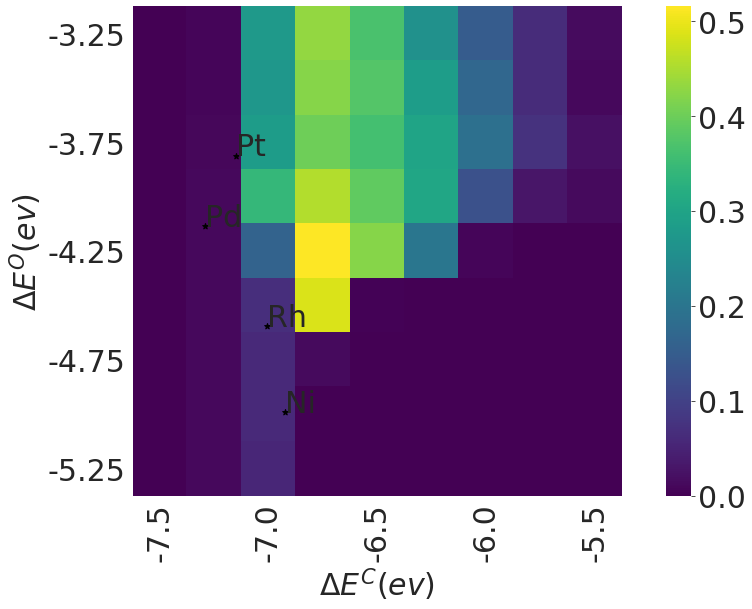

In [7]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=1 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/1_syngas_conv_origianl.pdf', bbox_inches='tight')

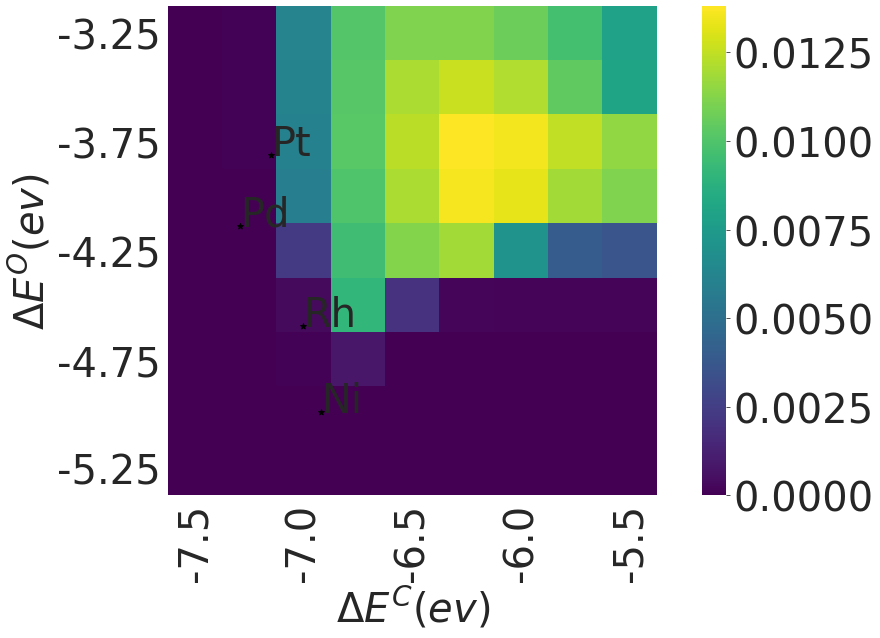

In [11]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'H2O out'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(h2o_out) + abs(co2_out)
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=1 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/1_full_conv_original.pdf', bbox_inches='tight')

# Plots at 2.6

In [23]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
#             ch4_conv = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'Max CH4 Conv'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[1.89498241e-12, 1.97361670e-11, 1.50541914e-02, 9.67318185e-02,
        1.08227696e-01, 9.76538378e-02, 9.84339461e-02, 1.23264718e-01,
        1.68105400e-01],
       [1.89523598e-12, 1.97348991e-11, 1.50603784e-02, 9.59490146e-02,
        1.05211574e-01, 9.30400796e-02, 9.33361774e-02, 1.21327079e-01,
        1.65879360e-01],
       [1.89650387e-12, 1.97293204e-11, 1.52371095e-02, 8.77175098e-02,
        9.37199989e-02, 8.65438807e-02, 8.99554633e-02, 1.16184976e-01,
        1.47118147e-01],
       [1.58878794e-12, 1.97187969e-11, 1.51716911e-02, 9.27756579e-02,
        9.64642325e-02, 8.73865691e-02, 8.15715998e-02, 8.21534102e-02,
        8.51402919e-02],
       [1.89612350e-12, 1.97137254e-11, 1.34966134e-02, 1.14857650e-01,
        1.15294163e-01, 8.95809052e-02, 5.51566457e-02, 4.15563793e-02,
        3.99241352e-02],
       [1.89561635e-12, 1.97118235e-11, 1.25669003e-02, 1.08748369e-01,
        1.14331923e-01, 1.65093614e-03, 8.54091210e-04, 7.72622839e-04,
        7.5

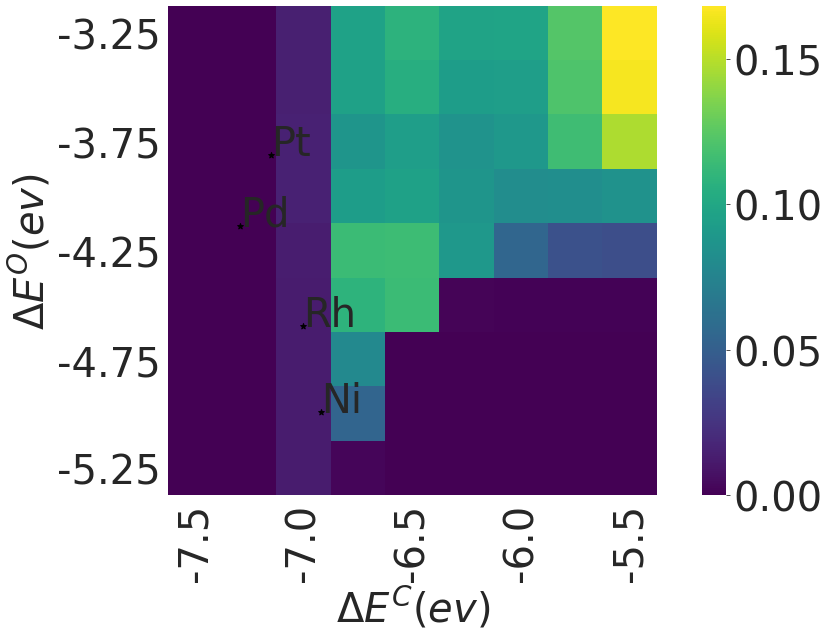

In [24]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=2.6 wihtout BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/2.6_ch4_conv_original.pdf')

## Syngas at C/O=2.6

In [25]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 in'].to_list()[0]
            syngas_conv = (co_out + h2_out / 2) / ch4_in
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[2.40035323e-11, 2.49915604e-10, 1.93931301e-02, 1.31026110e-01,
        1.38134388e-01, 1.09072052e-01, 7.29727260e-02, 3.53357859e-02,
        1.00114244e-02],
       [2.40042802e-11, 2.49910873e-10, 1.94434842e-02, 1.29723204e-01,
        1.32831821e-01, 1.01500333e-01, 6.75093523e-02, 3.50062838e-02,
        1.07819141e-02],
       [2.40058857e-11, 2.49849534e-10, 2.07072447e-02, 1.16619967e-01,
        1.12470788e-01, 8.89754662e-02, 6.28261788e-02, 3.30007459e-02,
        1.06094978e-02],
       [2.48178251e-11, 2.49739367e-10, 2.41295426e-02, 1.29913785e-01,
        1.20058594e-01, 9.17674364e-02, 5.74382830e-02, 2.32453943e-02,
        8.85965343e-03],
       [2.40000560e-11, 2.49639650e-10, 2.45535173e-02, 1.80725763e-01,
        1.63093800e-01, 1.03624748e-01, 3.37650199e-02, 8.06874167e-03,
        5.62314140e-03],
       [2.39999155e-11, 2.49628832e-10, 2.49475594e-02, 1.86212756e-01,
        1.75726261e-01, 1.61281266e-04, 5.31223409e-05, 4.51094418e-05,
        4.3

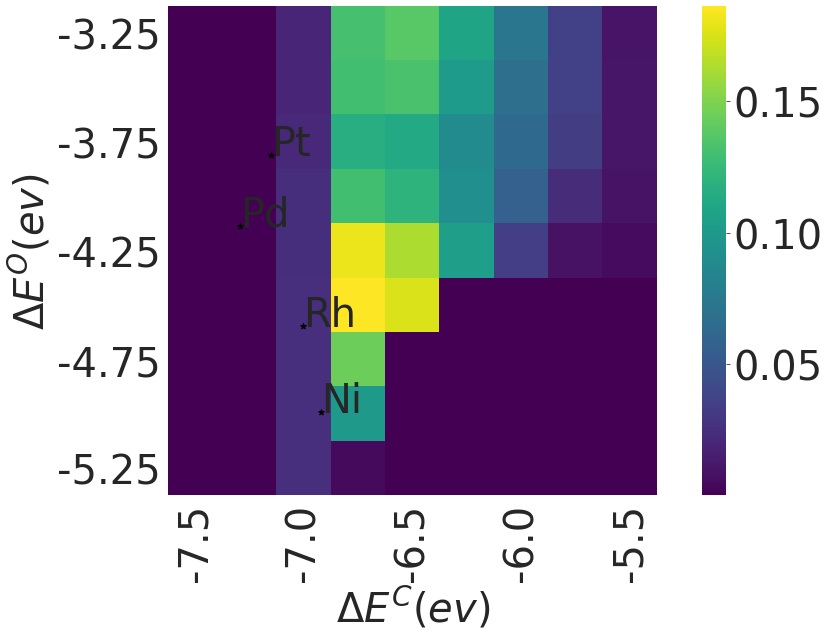

In [26]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/2.6_syngas_conv_original.pdf', bbox_inches='tight')

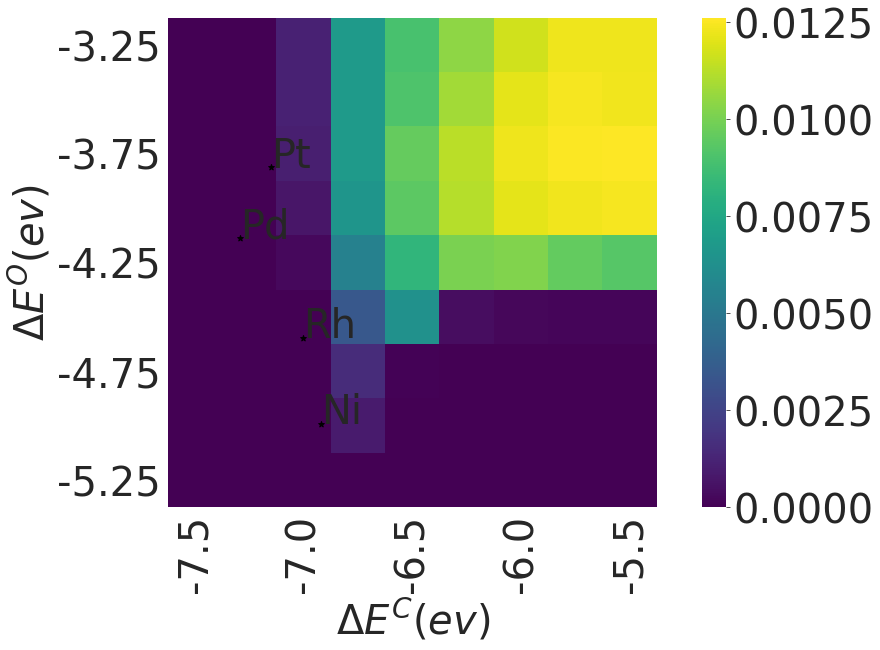

In [28]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'H2O out'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(h2o_out) + abs(co2_out)
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=1 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/2.6_full_conv_original.pdf', bbox_inches='tight')

# Plots at C/O=0.8

In [4]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            ch4_conv = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'Max CH4 Conv'].to_list()[0]
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '81.0_c-7.50o-5.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 81.0


array([[4.16333634e-15, 4.16333634e-15, 9.10634002e-02, 4.59778750e-01,
        5.24257505e-01, 4.49449602e-01, 3.58926447e-01, 4.53148115e-01,
        9.59467123e-01],
       [4.16333634e-15, 4.16333634e-15, 9.09648500e-02, 4.57701353e-01,
        5.09865883e-01, 4.19844301e-01, 3.38987337e-01, 4.31333240e-01,
        9.42023143e-01],
       [4.16333634e-15, 4.16333634e-15, 9.68963012e-02, 4.32304647e-01,
        4.44447069e-01, 3.79107349e-01, 3.23108003e-01, 4.09765779e-01,
        7.56085436e-01],
       [4.16333634e-15, 4.16333634e-15, 9.97296042e-02, 4.41334587e-01,
        4.42291014e-01, 3.77891495e-01, 3.24208838e-01, 3.30914468e-01,
        3.66778975e-01],
       [4.16333634e-15, 4.16333634e-15, 7.33199375e-02, 5.18259379e-01,
        5.27910661e-01, 4.14180434e-01, 3.39095946e-01, 3.04955594e-01,
        3.00188687e-01],
       [4.16333634e-15, 4.16333634e-15, 6.79553277e-02, 4.61915802e-01,
        6.14649048e-01, 4.73418638e-01, 3.51246169e-01, 2.87249067e-01,
        2.7

[Text(0.5, 1.0, 'CH4 Conversion at C/O=0.8'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

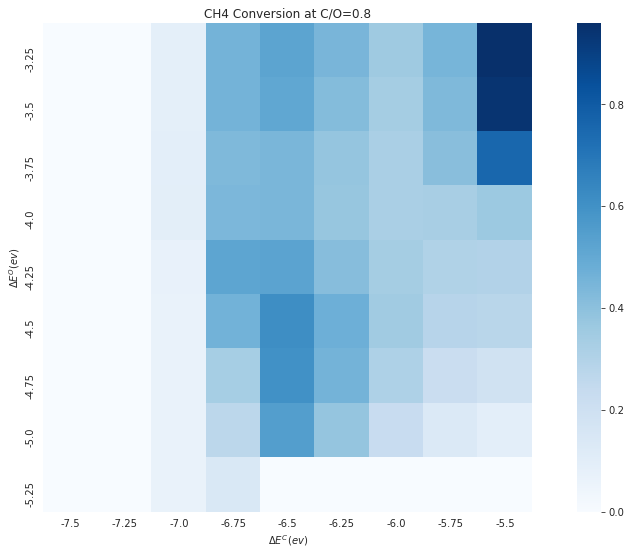

In [5]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="CH4 Conversion at C/O=0.8",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

# Syngas

In [6]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 0.8].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 0.8].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.8].loc[:,'CH4 in'].to_list()[0]
            syngas_conv = (co_out + h2_out) / ch4_in
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '81.0_c-7.50o-5.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 81.0


array([[2.52897812e-15, 2.74993451e+00, 2.74993131e+00, 2.74992991e+00,
        2.74991012e+00, 2.74791183e+00, 2.70833832e+00, 2.62651996e+00,
        2.53546983e+00],
       [2.52897811e-15, 2.74993107e+00, 2.74992934e+00, 2.74992658e+00,
        2.74987757e+00, 2.74516766e+00, 2.70138623e+00, 2.62753194e+00,
        2.54561684e+00],
       [2.52897812e-15, 2.74992922e+00, 2.74992840e+00, 2.74992360e+00,
        2.74984029e+00, 2.74472105e+00, 2.70311930e+00, 2.63143572e+00,
        2.54937993e+00],
       [2.52897812e-15, 2.74993526e+00, 2.74992848e+00, 2.74992713e+00,
        2.74989227e+00, 2.74785329e+00, 2.71207606e+00, 2.63917069e+00,
        2.55546313e+00],
       [2.52897812e-15, 6.20076767e-01, 2.74992851e+00, 2.74992840e+00,
        2.74992423e+00, 2.74981577e+00, 2.73844314e+00, 2.67048131e+00,
        2.57844922e+00],
       [2.52897812e-15, 3.77924109e-01, 2.74992847e+00, 2.74992848e+00,
        2.74992822e+00, 2.74991839e+00, 2.74971039e+00, 2.73024729e+00,
        2.6

[Text(0.5, 1.0, 'Syngas Conversion'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

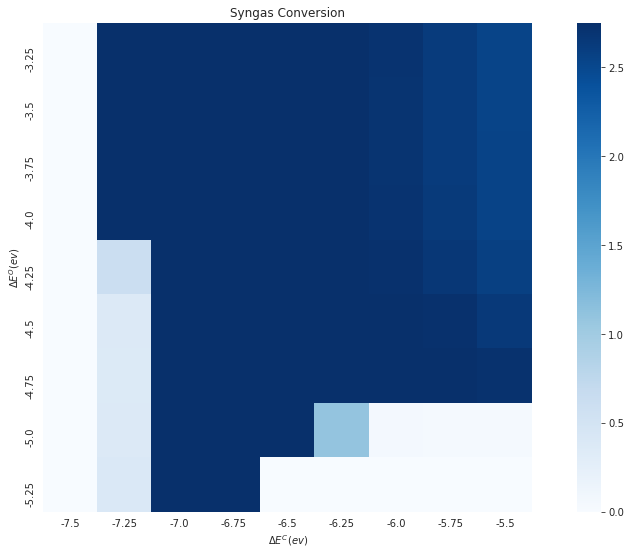

In [9]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="Syngas Conversion",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

## Plot the volcano plots for half change distance

In [7]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            half_conc_dist = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'Dist to 50 CH4 Conv'].to_list()[0]
            if half_conc_dist == 510:
                data[j][i] = 0
            else:
                data[j][i] = abs(half_conc_dist)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '81.0_c-7.50o-5.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 81.0


array([[ 0.  , 12.93, 10.09, 10.06, 10.06, 10.07, 10.08, 10.09, 10.1 ],
       [ 0.  , 12.83, 10.09, 10.06, 10.06, 10.07, 10.08, 10.09, 10.1 ],
       [ 0.  , 13.05, 10.09, 10.06, 10.06, 10.07, 10.08, 10.09, 10.1 ],
       [ 0.  , 19.96, 10.06, 10.05, 10.06, 10.07, 10.08, 10.09, 10.1 ],
       [ 0.  ,  0.  , 10.07, 10.04, 10.05, 10.06, 10.08, 10.09, 10.1 ],
       [ 0.  ,  0.  , 10.3 , 10.04, 10.05, 10.06, 10.08, 10.1 , 10.11],
       [ 0.  ,  0.  , 11.48, 10.04, 10.21, 10.35, 10.41, 10.44, 10.46],
       [ 0.  ,  0.  , 11.74, 10.44, 14.97, 18.59, 19.94,  0.  ,  0.  ],
       [ 0.  ,  0.  , 11.53, 14.08,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

[Text(0.5, 1.0, 'half concentration disctantces'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

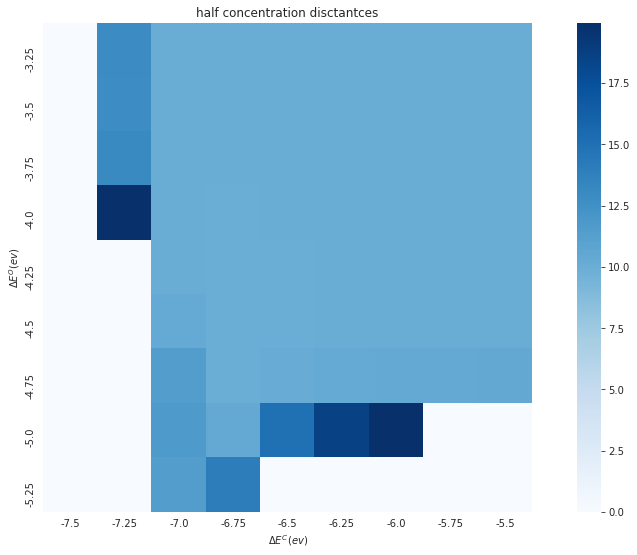

In [8]:
half_conc_dist_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(half_conc_dist_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="half concentration disctantces",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

## Distances to max temperature

In [10]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            max_temp_dist = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'Dist to max temp'].to_list()[0]
            data[j][i] = abs(max_temp_dist)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '81.0_c-7.50o-5.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 81.0


array([[ 9.26, 13.58, 10.2 , 10.12, 10.13, 10.15, 10.16, 10.17, 10.15],
       [10.  , 13.46, 10.2 , 10.13, 10.14, 10.15, 10.16, 10.16, 10.15],
       [10.01, 13.64, 10.21, 10.14, 10.15, 10.16, 10.16, 10.16, 10.15],
       [10.  , 70.  , 10.17, 10.13, 10.14, 10.16, 10.16, 10.16, 10.15],
       [10.  , 70.  , 10.15, 10.12, 10.14, 10.16, 10.16, 10.16, 10.15],
       [10.01, 70.  , 10.46, 10.11, 10.13, 10.15, 10.17, 10.17, 10.17],
       [ 9.26, 70.  , 20.  , 10.1 , 10.28, 10.43, 10.49, 10.51, 10.52],
       [10.  , 70.  , 20.  , 10.47, 15.01, 18.64, 70.  , 70.  , 70.  ],
       [ 0.  , 70.  , 20.  , 14.15, 70.  , 70.  , 70.  , 70.  , 70.  ]])

[Text(0.5, 1.0, 'half concentration disctantces'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

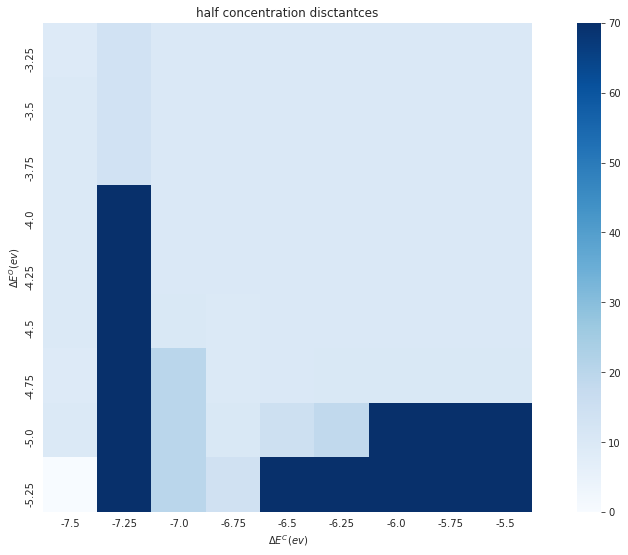

In [11]:
max_temp_dist_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(max_temp_dist_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="half concentration disctantces",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

In [28]:
import shutil
rtols = [1.0e-10, 1.0e-09, 1.0e-08, 1.0e-07, 1.0e-06]
atols = [1.0e-20, 1.0e-18, 1.0e-16, 1.0e-14, 1.0e-12]
tol_combs = []
for index in range(len(rtols)):
    tol_combs.append([rtols[index], atols[index]])
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1
        for tol_comb in tol_combs:
            f_path = '{}_c{:.2f}o{:.2f}/rtol_{}_atol_{}'.format(index, c_binding_energy, o_binding_energy, tol_comb[0], tol_comb[1])
            shutil.rmtree(f_path)
